In [1]:
from pytestlab.instruments.WaveformGenerator import WaveformGenerator
from pytestlab.profiles.keysight.smartbench import awg_profile

wave_visa_resource = "TCPIP::169.254.237.226::inst0::INSTR"

awg = WaveformGenerator(visa_resource=wave_visa_resource, profile=awg_profile["EDU33212A"])

SCPIConnectionError: Failed to connect to the instrument: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.

In [5]:
awg.reset()

In [6]:
import numpy as np

# Load the numpy array from the file
array_data = np.load('awg_raw.npy')


In [4]:
# Normalize the data to signed 16 bit
max_val = 32767
min_val = -32767
scaled_data = (array_data - np.min(array_data)) / (np.max(array_data) - np.min(array_data))
normalized_data = scaled_data * (max_val - min_val) + min_val

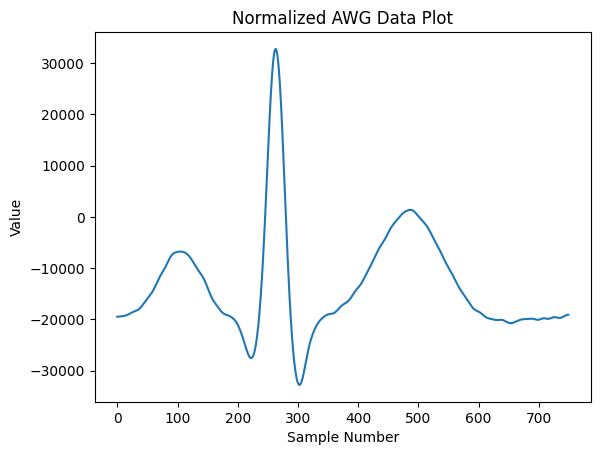

In [5]:
import matplotlib.pyplot as plt

# Plot the normalized data
plt.plot(normalized_data)
plt.title("Normalized AWG Data Plot")
plt.xlabel("Sample Number")
plt.ylabel("Value")
plt.show()

In [6]:
# Convert the numpy array to a comma-separated string of values
formatted_data = ', '.join(map(str, normalized_data.astype(int)))

print(formatted_data)


-19485, -19464, -19446, -19429, -19415, -19403, -19392, -19381, -19368, -19353, -19334, -19313, -19288, -19260, -19226, -19187, -19141, -19088, -19031, -18972, -18910, -18846, -18781, -18717, -18656, -18598, -18546, -18498, -18451, -18406, -18359, -18310, -18257, -18198, -18129, -18049, -17956, -17852, -17737, -17612, -17478, -17336, -17187, -17031, -16874, -16717, -16561, -16405, -16249, -16094, -15939, -15786, -15633, -15480, -15324, -15163, -14995, -14820, -14636, -14442, -14236, -14017, -13786, -13544, -13295, -13040, -12784, -12527, -12274, -12029, -11794, -11571, -11359, -11156, -10958, -10763, -10569, -10372, -10170, -9959, -9737, -9504, -9263, -9017, -8771, -8528, -8293, -8069, -7860, -7672, -7506, -7363, -7244, -7144, -7062, -6996, -6943, -6903, -6872, -6846, -6824, -6805, -6788, -6776, -6768, -6766, -6769, -6777, -6792, -6815, -6848, -6891, -6945, -7009, -7083, -7168, -7263, -7371, -7491, -7622, -7765, -7917, -8079, -8251, -8430, -8617, -8809, -9005, -9201, -9397, -9592, -978

In [245]:
awg._send_command(f"DATA:ARB:DAC test, {formatted_data}")

In [190]:
awg.output(1, True)

In [246]:
awg._send_command("FUNCtion:ARBitrary \"testT\"")

In [228]:
awg._send_command("FUNCtion:ARBitrary:FILTer NORM")

In [247]:
awg._send_command("FUNCtion ARB")
awg._send_command("VOLTage +0.1")
awg._send_command("VOLTage:OFFSet 0")
awg._send_command("FUNC:ARB:FREQ 1000")

In [5]:
from pytestlab.instruments.Oscilloscope import Oscilloscope
from pytestlab.profiles.keysight.smartbench import oscilloscope_profile
visa_resource = "TCPIP::169.254.70.148::inst0::INSTR"
osc = Oscilloscope(visa_resource=visa_resource, profile=oscilloscope_profile["DSOX1204G"])

osc.reset()


In [220]:
osc.reset()

In [12]:
osc._send_command("CHAN2:DISP ON")
osc._send_command("CHAN1:DISP OFF")
osc._send_command("TRIGger:SOURce CHAN2")
osc._send_command("TRIGger:LEVel 0.2, CHAN2")
osc._send_command("CHAN2:SCAL 0.5")
osc._send_command("TIM:SCAL 1e-4")

In [249]:
awg.output(2, True)
osc._send_command("CHAN1:DISP ON")

In [198]:
# awg._send_command(f"SOURCE1:DATA:VOL:CLEAR")

In [272]:
awg._send_command(f"SOUR2:DATA:VOL:CLEAR")

In [267]:
awg._send_command(f"SOURCE1:DATA:VOL:CLEAR")
awg._send_command(f"DATA:ARB:DAC test, {formatted_data}")
awg._send_command(f"SOURCE1:FUNCTION ARB")
awg._send_command(f"FUNCTION:ARB:FILTER NORM")
awg._send_command(f"SOURCE1:FUNCtion:ARBitrary TEST")
awg.output(1, True)
# awg._send_command("FUNCtion ARB")
awg._send_command("VOLTage +0.1")
awg._send_command("VOLTage:OFFSet 0")
awg._send_command("FUNC:ARB:FREQ 1000")
# awg._send_command(f"SOURCE1:FUNCTION:ARB:FILE \"TEST\"")
# binary_waveform = normalized_data.tobytes()
# print(binary_waveform)
# awg._send_command(f"DATA:ARB:DAC myArb, {binary_waveform}")
# awg._send_command(f"SOURCE2:FUNCtion:ARBitrary \"myArb\"")

In [218]:
awg._send_command(f"SOURCE1:FUNCtion:ARBitrary \"myArb\"")

In [25]:
awg._send_command(f"SOURCE2:DATA:VOL:CLEAR")
awg._send_command(f"SOUR2:DATA:ARB:DAC myArb, {formatted_data}")
awg._send_command("SOUR2:FUNCtion:ARBitrary \"myArb\"")
awg._send_command("SOUR2:FUNCtion:ARBitrary:FILTer NORM")
awg._send_command("SOUR2:FUNCtion ARB")
awg._send_command("SOUR2:VOLTage +0.1")
awg._send_command("SOUR2:VOLTage:OFFSet 0")
awg._send_command("SOUR2:FUNC:ARB:FREQ 1000")
awg.output(2, True)

In [22]:
awg.reset()

In [11]:
awg.set_arbitrary_waveform(1, array_data)
# awg._send_command("SOUR1:FUNCtion ARB")
# awg._send_command("SOUR2:VOLTage +0.1")
# awg._send_command("SOUR2:VOLTage:OFFSet 0")
# awg._send_command("SOUR2:FUNC:ARB:FREQ 1000")
awg.output(2, False)
awg.output(1, True)

In [15]:
awg._send_command(f"SOUR2:DATA:VOL:CLEAR")
# awg._send_command("SOUR1:FUNCtion \"pytestlabArb\"")

In [19]:
awg._send_command(f"SOUR2:DATA:ARB:DAC pytestlab1, {formatted_data}")


In [16]:
awg.close()

In [6]:
osc.measure_voltage_peak_to_peak(2)

+1.4E+00
 V

In [7]:
osc.set_probe_attenuation(2, 1)

AttributeError: 'Oscilloscope' object has no attribute 'set_probe_scale'

In [15]:
osc.close()

In [1]:
import time,asyncio

async def count():
    print("count one")
    await asyncio.sleep(1)
    print("count four")

async def count_further():
    print("count two")
    await asyncio.sleep(1)
    print("count five")

async def count_even_further():
    print("count three")
    await asyncio.sleep(1)
    print("count six")

async def main():
    await asyncio.gather(count(), count_further(), count_even_further())

s = time.perf_counter()
await main()
elapsed = time.perf_counter() - s
print(f"Script executed in {elapsed:0.2f} seconds.")

count one
count two
count three
count four
count five
count six
Script executed in 1.00 seconds.


In [3]:
import json
import re

def preprocess_pyson(pyson_str):
    """
    Preprocess the .pyson string to make it compatible with json.loads.
    Convert hexadecimal strings and handle numeric keys.
    """
    # Convert hexadecimal strings
    pyson_str = re.sub(r'0x[0-9a-fA-F]+', lambda m: str(int(m.group(), 16)), pyson_str)

    # Handle numeric keys by converting them to strings
    pyson_str = re.sub(r'(?<={|,)\s*(\d+)\s*:', r'"\1":', pyson_str)

    return pyson_str

def loads(pyson_str):
    """
    Parse a .pyson string and convert it into a Python object.
    """
    try:
        # Preprocess the .pyson string
        processed_str = preprocess_pyson(pyson_str)

        # Use json.loads to parse the processed string
        return json.loads(processed_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Invalid PYSON format: {e}")

# Example usage
pyson_data = """
{
    "vendor_id": 0x2A8D,
    "product_id": 0x0396,
    "channels": {
        1: {"description": "Analog Channel 1"},
        2: {"description": "Analog Channel 2"}
    }
}
"""
loaded_data = loads(pyson_data)
print(loaded_data)

{'vendor_id': 10893, 'product_id': 918, 'channels': {'1': {'description': 'Analog Channel 1'}, '2': {'description': 'Analog Channel 2'}}}
10893
